In [1]:
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 72., 625.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [656., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [767.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 8 BarContainer objects>)

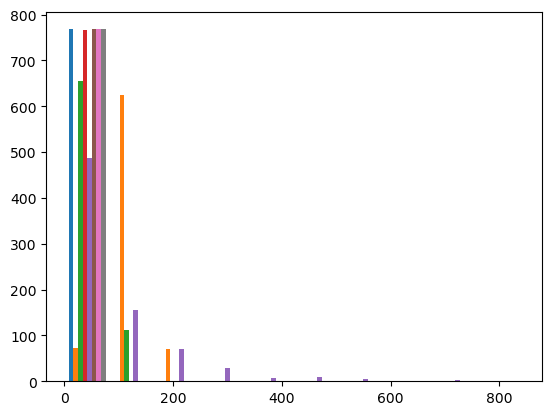

In [3]:
#assigning features to x and target to y
X = data.drop(["Outcome"], axis=1) 
y = data['Outcome']

plt.hist(X)

In [4]:
# Normalize
for column in X:
    X[column] = (X[column] - X[column].mean()) / (X[column].std())

X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483
...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970


## Data Visulation

### CoVar Matrix

<AxesSubplot:>

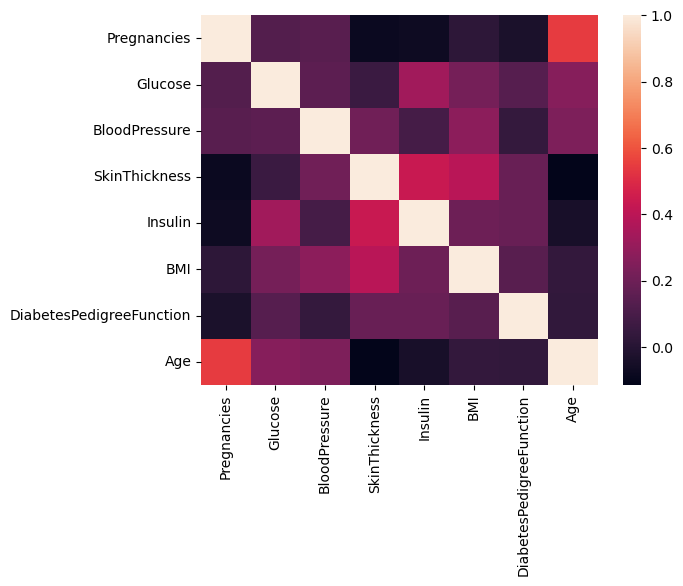

In [5]:
sns.heatmap(X.corr( ), annot=False)


(array([[  0.,   0., 111., 381., 190.,  63.,  22.,   1.,   0.,   0.],
        [  5.,   4., 131., 356., 180.,  86.,   6.,   0.,   0.,   0.],
        [ 35.,   3.,  37., 344., 325.,  23.,   1.,   0.,   0.,   0.],
        [  0.,   0., 229., 182., 298.,  56.,   2.,   0.,   1.,   0.],
        [  0.,   0.,   0., 536., 165.,  42.,  10.,  11.,   2.,   2.],
        [ 11.,   0., 123., 329., 234.,  63.,   6.,   2.,   0.,   0.],
        [  0.,   0., 114., 410., 172.,  48.,  15.,   5.,   2.,   2.],
        [  0.,   0., 173., 325., 176.,  69.,  24.,   1.,   0.,   0.]]),
 array([-4.05782947, -2.98719586, -1.91656224, -0.84592862,  0.22470499,
         1.29533861,  2.36597223,  3.43660584,  4.50723946,  5.57787308,
         6.64850669]),
 <a list of 8 BarContainer objects>)

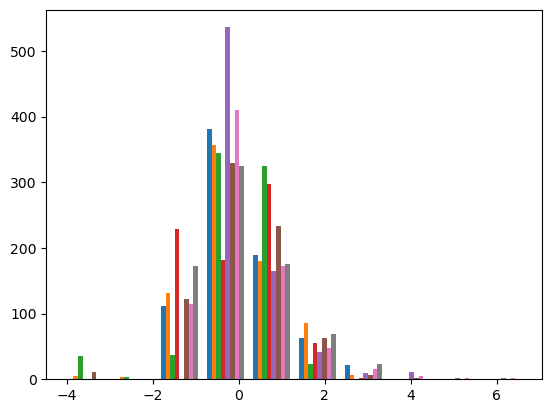

In [6]:
plt.hist(X)

In [7]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=102)


In [10]:
test_scores_minmax = []
train_scores_minmax = []

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    
    print(f"Test score for {i}: {test_score}")
    print(f"Train score for {i}: {train_score}")
    print()
    
    test_scores_minmax.append(test_score)
    train_scores_minmax.append(train_score)

C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Test score for 1: 0.7337662337662337
Train score for 1: 1.0

Test score for 2: 0.7467532467532467
Train score for 2: 0.8420195439739414

Test score for 3: 0.7272727272727273
Train score for 3: 0.8631921824104235

Test score for 4: 0.7402597402597403
Train score for 4: 0.8289902280130294

Test score for 5: 0.7077922077922078
Train score for 5: 0.8289902280130294

Test score for 6: 0.7012987012987013
Train score for 6: 0.8078175895765473

Test score for 7: 0.7467532467532467
Train score for 7: 0.7996742671009772

Test score for 8: 0.7142857142857143
Train score for 8: 0.8029315960912052

Test score for 9: 0.7402597402597403
Train score for 9: 0.7947882736156352

Test score for 10: 0.7467532467532467
Train score for 10: 0.7866449511400652



C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Test score for 11: 0.7402597402597403
Train score for 11: 0.7964169381107492

Test score for 12: 0.7597402597402597
Train score for 12: 0.7801302931596091

Test score for 13: 0.7792207792207793
Train score for 13: 0.7817589576547231

Test score for 14: 0.7597402597402597
Train score for 14: 0.7703583061889251

Test score for 15: 0.7792207792207793
Train score for 15: 0.7801302931596091



C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Test score for 16: 0.7532467532467533
Train score for 16: 0.7768729641693811

Test score for 17: 0.7597402597402597
Train score for 17: 0.7801302931596091

Test score for 18: 0.7662337662337663
Train score for 18: 0.7785016286644951

Test score for 19: 0.7532467532467533
Train score for 19: 0.7817589576547231

Test score for 20: 0.7597402597402597
Train score for 20: 0.7752442996742671



C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Test score for 21: 0.7792207792207793
Train score for 21: 0.7850162866449512

Test score for 22: 0.7792207792207793
Train score for 22: 0.7752442996742671

Test score for 23: 0.7792207792207793
Train score for 23: 0.7768729641693811

Test score for 24: 0.7662337662337663
Train score for 24: 0.7638436482084691

Test score for 25: 0.7727272727272727
Train score for 25: 0.757328990228013



C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Test score for 26: 0.7727272727272727
Train score for 26: 0.752442996742671

Test score for 27: 0.7857142857142857
Train score for 27: 0.7654723127035831

Test score for 28: 0.7922077922077922
Train score for 28: 0.758957654723127

Test score for 29: 0.7987012987012987
Train score for 29: 0.7719869706840391



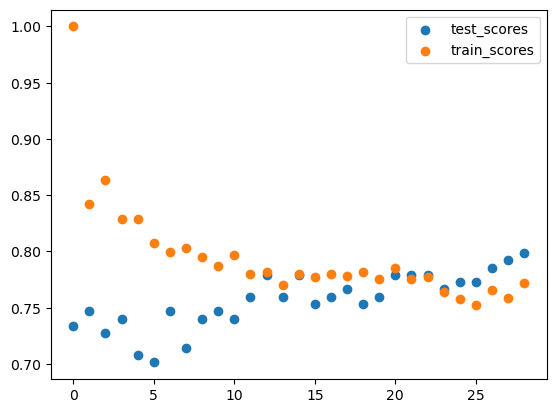

In [9]:
x = [i for i in range(0, len(test_scores_minmax))]
  
# plot lines
plt.scatter(x, test_scores_minmax, label = "test_scores")
plt.scatter(x, train_scores_minmax, label = "train_scores")
plt.legend()
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=15)
knn = knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
   

C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [15]:
#training score
knn.score(X_train, y_train)*100

C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


78.0130293159609

In [18]:
#testing score
knn.score(X_test, y_test)*100

C:\Users\morga\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


77.92207792207793

<AxesSubplot:>

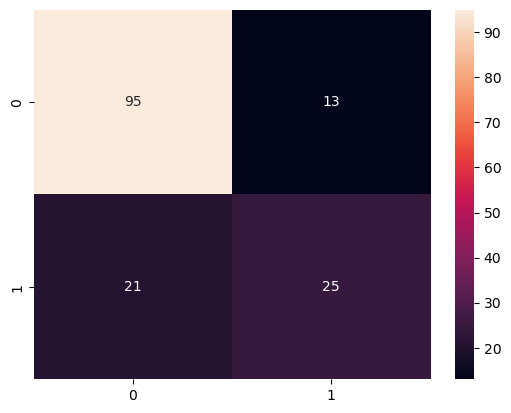

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True)
